## Topics Covered:
1. Introduction to SVM
2. Importing required libraries
3. Reading Dataset
4. Distribution of classes
5. Selection of unwanted columns
6. Identifying Unwanted rows
7. Remove Unwanted columns
8. divide dataset Train/Test dataset
9. Modeling (SVM)
10. Results

## Introduction :
In this notebook, we have taken dataset from Kaggle, one datset having record of Epileptic patients and another is of normal persons. First we have merged both datasets and then applied the SVM classifier to classify data as epileptic or non-epileptic data.


### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv('cell_samples.csv')
df.head()
df.tail()
df.shape
df.size

7689

In [3]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [4]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [5]:
##Distribution of classes

In [4]:
m_df=df[df['Class']==4][0:200]
m_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
5,1017122,8,10,10,8,7,10,9,7,1,4
12,1041801,5,3,3,3,2,3,4,4,1,4
14,1044572,8,7,5,10,7,9,5,5,4,4
15,1047630,7,4,6,4,6,1,4,3,1,4
18,1050670,10,7,7,6,4,10,4,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...
491,1119189,5,8,9,4,3,10,7,1,1,4
493,1142706,5,10,10,10,6,10,6,5,2,4
506,1286943,8,10,10,10,7,5,4,8,7,4
514,1306282,6,6,7,10,3,10,8,10,2,4


In [5]:
b_df=df[df['Class']==2][0:200]
b_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
355,857774,4,1,1,1,3,1,2,2,1,2
362,888169,3,2,2,1,4,3,2,1,1,2
363,888523,4,4,4,2,2,3,2,1,1,2
364,896404,2,1,1,1,2,1,3,1,1,2


In [6]:
%matplotlib inline

In [9]:
#help(b_df.plot)


In [10]:
df.columns


Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

<AxesSubplot:>

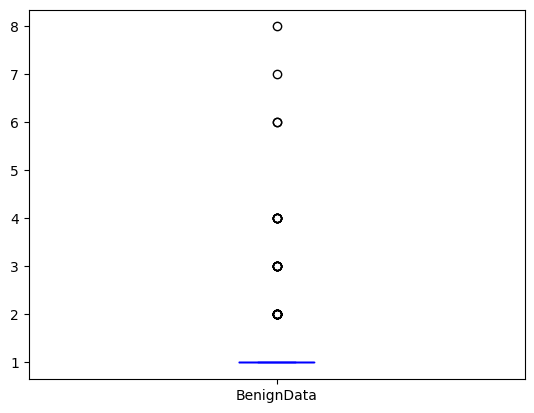

In [7]:
b_df.plot(kind='box',x='Clump',y='UnifSize',color='blue', label='BenignData')

<AxesSubplot:>

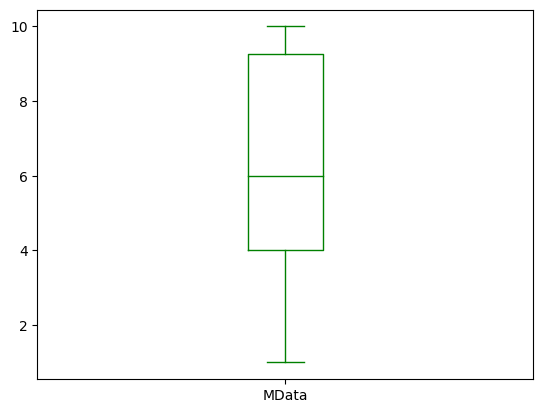

In [8]:
m_df.plot(kind='box',x='Clump',y='UnifSize',color='green', label='MData')

<AxesSubplot:>

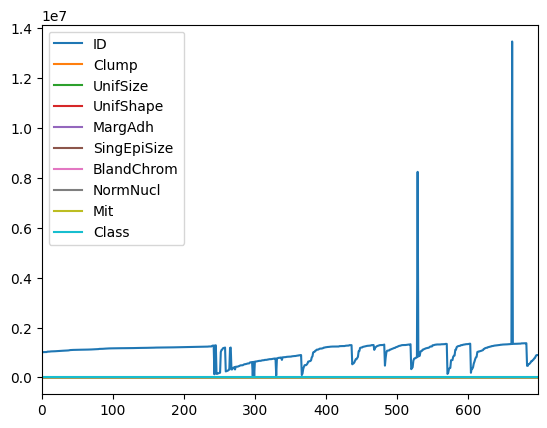

In [9]:

df.plot()
#plt.show()

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

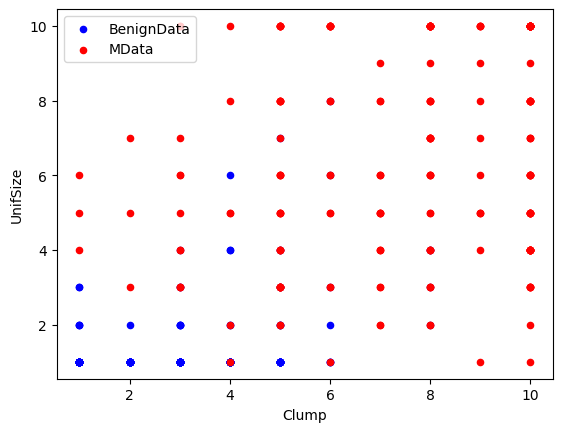

In [10]:
axes=b_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue', label='BenignData')
m_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red', label='MData',ax=axes)

In [13]:
#6. Identifying Unwanted rows
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [14]:
#discarding non-numeric values
#step 1:
df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
#Step 2:
df['BareNuc']=df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [15]:
#7. Remove Unwanted columns
df.columns


Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [16]:
updated_df=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#filtered out irrelevant columns
#Independent variable
X=np.asarray(updated_df)

#dependent variable
y=np.asarray(df['Class'])
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [31]:
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

### 8. divide dataset Train/Test dataset

In [20]:
'''
df-->Train/Test
Train(x,y)##x itself is a 2D array ##y is 1D
Test(X,y)

'''
from sklearn.model_selection import train_test_split
train_test_split(X,y)

[array([[10,  8,  8, ...,  4,  8, 10],
        [10, 10, 10, ...,  8,  2,  1],
        [ 5,  2,  1, ...,  3,  1,  1],
        ...,
        [ 9, 10, 10, ...,  3,  3,  1],
        [ 7,  8,  3, ...,  7,  8,  2],
        [ 4,  1,  1, ...,  3,  2,  1]], dtype=int64),
 array([[ 5,  3,  4, ...,  4,  9,  1],
        [ 5,  1,  3, ...,  2,  1,  1],
        [10,  6,  4, ...,  3,  2,  3],
        ...,
        [ 3,  1,  1, ...,  2,  1,  1],
        [ 5,  3,  3, ...,  2,  1,  1],
        [ 5,  3,  4, ...,  4,  7,  1]], dtype=int64),
 array([4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
        2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4,
        2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2,
        2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2,
        2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4,
        2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
        4, 4, 2, 4, 2, 4, 4, 2, 

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=4)


In [35]:
x_train.shape

(546, 9)

In [37]:
y_train.shape

(546,)

In [38]:
x_test.shape

(137, 9)

In [39]:
y_test.shape

(137,)

## 9. Modeling (SVM)

In [23]:
from sklearn import svm
svm_classifier=svm.SVC(kernel='linear',gamma='auto',C=2) 
svm_classifier.fit(x_train,y_train)
y_predict=svm_classifier.predict(x_test)
y_predict

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4], dtype=int64)

## 10 Results

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [25]:
#from sklearn.metrics import confusion_matrix
from sklearn import metrics
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_predict))

Confusion matrix:
[[85  5]
 [ 0 47]]


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


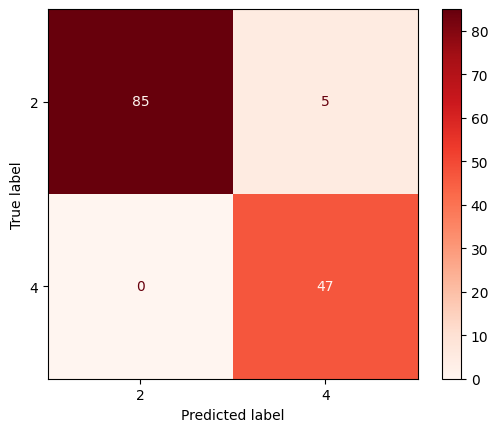

In [26]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

plot_confusion_matrix(svm_classifier, x_test, y_test, cmap=plt.cm.Reds)  
plt.show()  